# Analysis

## Description

The questions to be answered in this analysis are:
1. How does Animal size change over time?
2. How do Seastar populations change over time?
3. is there a correlation between Seastar population and size over time?

## Table of Contents

- [HOME](README.md)
- [EDA Species Sizes](#eda-species-sizes)
- [EDA Species Counts](#eda-species-counts)
- [Animal Size Over Time](#animal-size-over-time)
- [Seastar Population Over Time](#animal-count-over-time---sea-stars)
- [Seastar Size and Population Correlation](#seastar-size-and-population-correlation)
- [Results](#results)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA Species Sizes

1. load and summarize data
2. get basic statistics on data
3. get categorical counts
4. create histograms of numeric columns

In [2]:
sizes_df = pd.read_csv("species_sizes_cleaned_merged.csv")

In [3]:
sizes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19697 entries, 0 to 19696
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SiteID                19697 non-null  object 
 1   SamplingSeasonCode    19697 non-null  object 
 2   Year                  19697 non-null  int64  
 3   SeasonSeq             19697 non-null  int64  
 4   PlotID                19697 non-null  object 
 5   SixLetterCode         19697 non-null  object 
 6   SpeciesCount          19697 non-null  int64  
 7   SpeciesSize           19697 non-null  float64
 8   intertidal_sitename   19697 non-null  object 
 9   intertidal_Latitude   19697 non-null  float64
 10  intertidal_Longitude  19697 non-null  float64
 11  classification_name   19697 non-null  object 
 12  kingdom               19697 non-null  object 
 13  phylum_division       19697 non-null  object 
 14  class                 19697 non-null  object 
 15  order              

In [4]:
sizes_df.columns

Index(['SiteID', 'SamplingSeasonCode', 'Year', 'SeasonSeq', 'PlotID',
       'SixLetterCode', 'SpeciesCount', 'SpeciesSize', 'intertidal_sitename',
       'intertidal_Latitude', 'intertidal_Longitude', 'classification_name',
       'kingdom', 'phylum_division', 'class', 'order', 'family'],
      dtype='object')

In [5]:
sizes_df["SeasonSeq"] = pd.Categorical(sizes_df["SeasonSeq"])
sizes_df["intertidal_Latitude"] = pd.Categorical(sizes_df["intertidal_Latitude"])
sizes_df["intertidal_Longitude"] = pd.Categorical(sizes_df["intertidal_Longitude"])

In [6]:
for col in sizes_df.select_dtypes(include=['object']).columns:
    print(f'{col} value count: {sizes_df[col].value_counts()}')
    print()

SiteID value count: SiteID
ALEG    5673
CARP    4053
COPT    2938
SHCO    2318
PTFM    1959
CRCO    1325
GPT     1284
CARE     147
Name: count, dtype: int64

SamplingSeasonCode value count: SamplingSeasonCode
SP05    1456
SP12    1310
SP04    1294
SP11    1274
FA03    1174
SP03    1162
SP13    1138
SP06    1115
SP07    1045
SP10     932
SP02     895
SP09     808
FA01     717
SP08     687
SP01     673
FA02     602
FA05     490
FA06     484
FA04     475
FA00     436
FA11     397
FA07     263
FA12     226
FA08     199
FA09     191
FA10     164
FA13      90
Name: count, dtype: int64

PlotID value count: PlotID
3       4013
2       3974
1       3953
4       3291
5       2847
site     571
1T       474
2T       321
3T       249
7          4
Name: count, dtype: int64

SixLetterCode value count: SixLetterCode
TEGFUN    5526
PISOCH    4833
NUCEMA    4352
ACASPP    2156
NUCSPP    2088
TEGGAL     208
OCESPP     168
TEGEIS     110
ACASPI      52
MACLIV      43
TEGAUR      34
NUCCAN      21
HOMSPP  

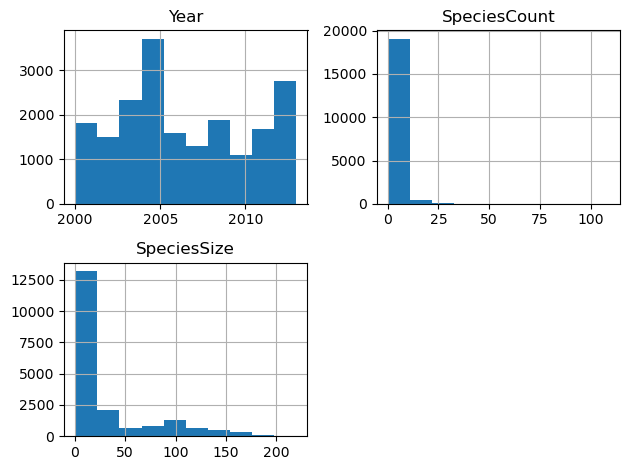

In [7]:
numeric_cols = sizes_df.select_dtypes(include=['int64', 'float64']).columns
sizes_df[numeric_cols].hist()
plt.tight_layout()
plt.show()

## EDA Species Counts

1. load and summarize data
2. get basic statistics on data
3. get categorical counts
4. create histograms of numeric columns

In [8]:
counts_df = pd.read_csv("species_counts_cleaned_merged.csv", low_memory=False)

In [9]:
counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107737 entries, 0 to 107736
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SiteID                107737 non-null  object 
 1   SamplingSeasonCode    107737 non-null  object 
 2   Year                  107737 non-null  int64  
 3   SeasonSeq             107737 non-null  int64  
 4   PlotID                107737 non-null  object 
 5   SixLetterCode         107737 non-null  object 
 6   SpeciesCount          107737 non-null  float64
 7   classification_name   97434 non-null   object 
 8   kingdom               97434 non-null   object 
 9   phylum_division       97434 non-null   object 
 10  class                 97434 non-null   object 
 11  order                 97434 non-null   object 
 12  family                97434 non-null   object 
 13  intertidal_sitename   107482 non-null  object 
 14  intertidal_Latitude   107482 non-null  float64
 15  

In [10]:
for col in counts_df.select_dtypes(include=['object']).columns:
    print(f'{col} value count: {sizes_df[col].value_counts()}')
    print()

SiteID value count: SiteID
ALEG    5673
CARP    4053
COPT    2938
SHCO    2318
PTFM    1959
CRCO    1325
GPT     1284
CARE     147
Name: count, dtype: int64

SamplingSeasonCode value count: SamplingSeasonCode
SP05    1456
SP12    1310
SP04    1294
SP11    1274
FA03    1174
SP03    1162
SP13    1138
SP06    1115
SP07    1045
SP10     932
SP02     895
SP09     808
FA01     717
SP08     687
SP01     673
FA02     602
FA05     490
FA06     484
FA04     475
FA00     436
FA11     397
FA07     263
FA12     226
FA08     199
FA09     191
FA10     164
FA13      90
Name: count, dtype: int64

PlotID value count: PlotID
3       4013
2       3974
1       3953
4       3291
5       2847
site     571
1T       474
2T       321
3T       249
7          4
Name: count, dtype: int64

SixLetterCode value count: SixLetterCode
TEGFUN    5526
PISOCH    4833
NUCEMA    4352
ACASPP    2156
NUCSPP    2088
TEGGAL     208
OCESPP     168
TEGEIS     110
ACASPI      52
MACLIV      43
TEGAUR      34
NUCCAN      21
HOMSPP  

In [11]:
counts_df["intertidal_Latitude"] = pd.Categorical(counts_df["intertidal_Latitude"])
counts_df["intertidal_Longitude"] = pd.Categorical(counts_df["intertidal_Longitude"])

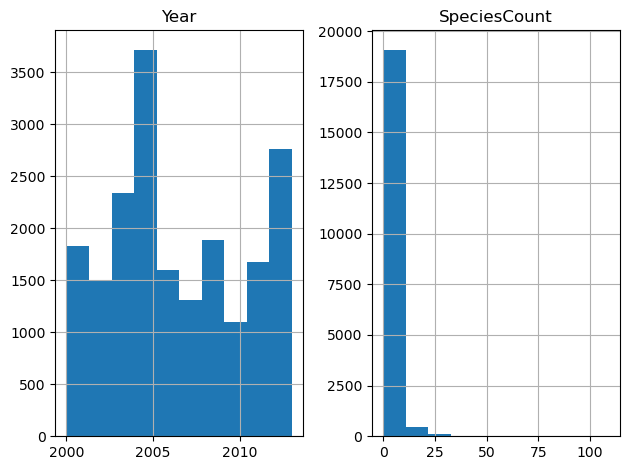

In [12]:
numeric_cols = counts_df.select_dtypes(include=['int64', 'float64']).columns
sizes_df[numeric_cols].hist()
plt.tight_layout()
plt.show()

## Animal Size Over Time

1. Aggregate data by year, and by season using species count and species sizes
2. Separate by Animal and Plant kingdoms
3. Update Column Names
3. Check summary for size and count to get median, mean and standard deviations
4. vizualize the data

In [13]:
size_summary = sizes_df.groupby(['Year', 'SamplingSeasonCode', 'kingdom', 'classification_name', "phylum_division",	"class", "order", "family"])
size_summary = size_summary.agg({'SpeciesSize': ['mean', 'median', 'std'], 'SpeciesCount': ['sum']}).reset_index()
size_summary.columns = ['Year', 'Season', 'Kingdom', 'Classification_Name', "Phylum", "Class", "Order", "Family", 'AvgSize', 'MedianSize', 'StdSize', 'TotalCount']
size_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 207 non-null    int64  
 1   Season               207 non-null    object 
 2   Kingdom              207 non-null    object 
 3   Classification_Name  207 non-null    object 
 4   Phylum               207 non-null    object 
 5   Class                207 non-null    object 
 6   Order                207 non-null    object 
 7   Family               207 non-null    object 
 8   AvgSize              207 non-null    float64
 9   MedianSize           207 non-null    float64
 10  StdSize              191 non-null    float64
 11  TotalCount           207 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB


In [14]:
size_summary.head()

,Year,Season,Kingdom,Classification_Name,Phylum,Class,Order,Family,AvgSize,MedianSize,StdSize,TotalCount
0,2000,FA00,Animalia,acanthinucella spp,Mollusca,Gastropoda,Neogastropoda,Muricidae,16.333333,17.0,4.875816,68
1,2000,FA00,Animalia,nucella spp,Mollusca,Gastropoda,Neogastropoda,Muricidae,21.794118,21.5,6.157341,196
2,2000,FA00,Animalia,pisaster ochraceus,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,82.250000,80.0,35.467170,753
3,2000,FA00,Animalia,tegula funebralis,Mollusca,Gastropoda,Archaeogastropoda,Trochidae,17.952381,18.0,6.011798,162
4,2001,FA01,Animalia,acanthinucella spp,Mollusca,Gastropoda,Neogastropoda,Muricidae,14.808511,14.0,4.397645,106


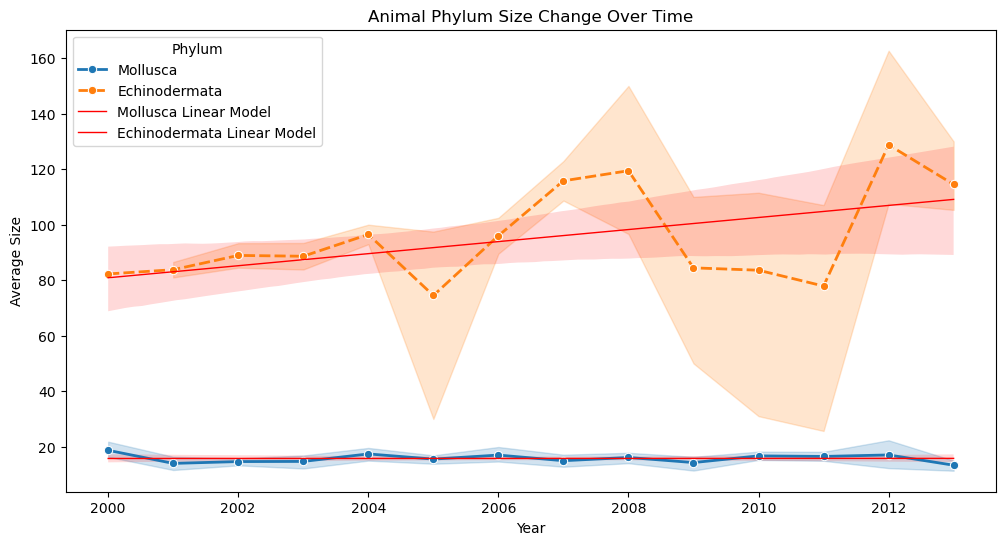

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=size_summary, x="Year", y="AvgSize", hue="Phylum", style="Phylum", marker="o", linewidth=2)
for season in size_summary["Season"].unique():
    season_data = size_summary[size_summary["Season"] == season]
sns.regplot(data=size_summary[size_summary["Phylum"] == "Mollusca"], x="Year", y="AvgSize", scatter=False, label=f'Mollusca Linear Model', line_kws={'color': 'red', 'linewidth': 1})
sns.regplot(data=size_summary[size_summary["Phylum"] == "Echinodermata"], x="Year", y="AvgSize", scatter=False, label=f'Echinodermata Linear Model', line_kws={'color': 'red', 'linewidth': 1})
plt.title("Animal Phylum Size Change Over Time")
plt.xlabel("Year")
plt.ylabel("Average Size")
plt.legend(title="Phylum")
plt.show()

In [16]:
mollusca_df = size_summary[size_summary["Phylum"] == "Mollusca"]
echinodermata_df = size_summary[size_summary["Phylum"] == "Echinodermata"]

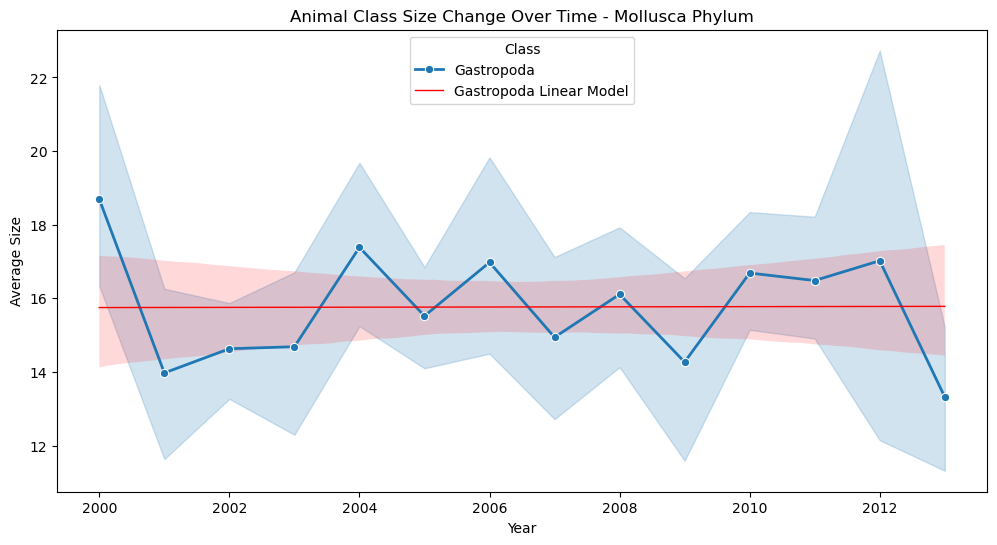

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=mollusca_df, x="Year", y="AvgSize", hue="Class", style="Class", marker="o", linewidth=2)
for class_name in mollusca_df['Class'].unique():
    class_data = mollusca_df[mollusca_df['Class'] == class_name]
    sns.regplot(data=class_data, x="Year", y="AvgSize", scatter=False, label=f'{class_name} Linear Model', line_kws={'color': 'red', 'linewidth': 1})

plt.title("Animal Class Size Change Over Time - Mollusca Phylum")
plt.xlabel("Year")
plt.ylabel("Average Size")
plt.legend(title="Class")
plt.show()

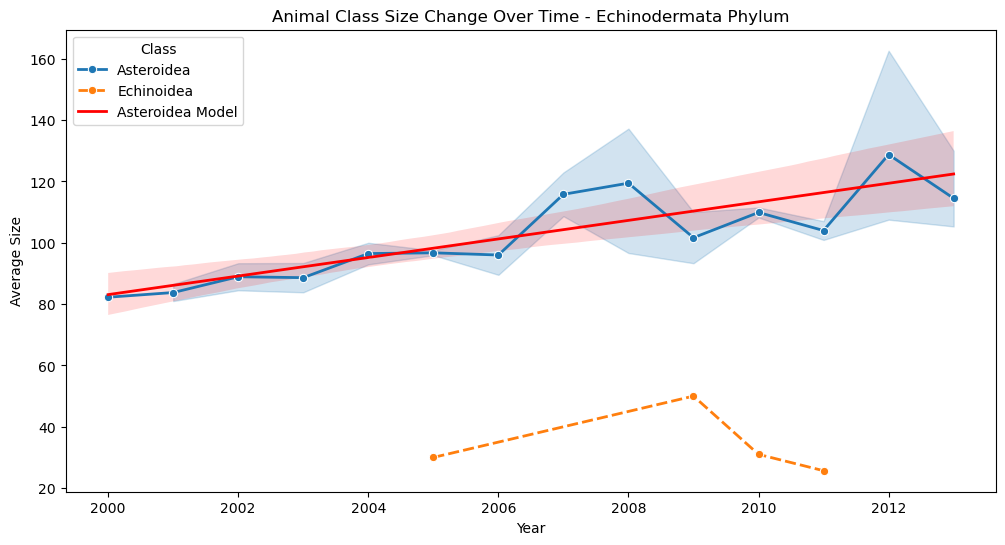

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=echinodermata_df, x="Year", y="AvgSize", hue="Class", style="Class", marker="o", linewidth=2)
for season in size_summary["Season"].unique():
    season_data = size_summary[size_summary["Season"] == season]

sns.regplot(data=echinodermata_df[echinodermata_df["Class"] == "Asteroidea"], x="Year", y="AvgSize", scatter=False, label=f"Asteroidea Model", line_kws={'color': 'red', 'linewidth': 2})

plt.title("Animal Class Size Change Over Time - Echinodermata Phylum")
plt.xlabel("Year")
plt.ylabel("Average Size")
plt.legend(title="Class")
plt.show()

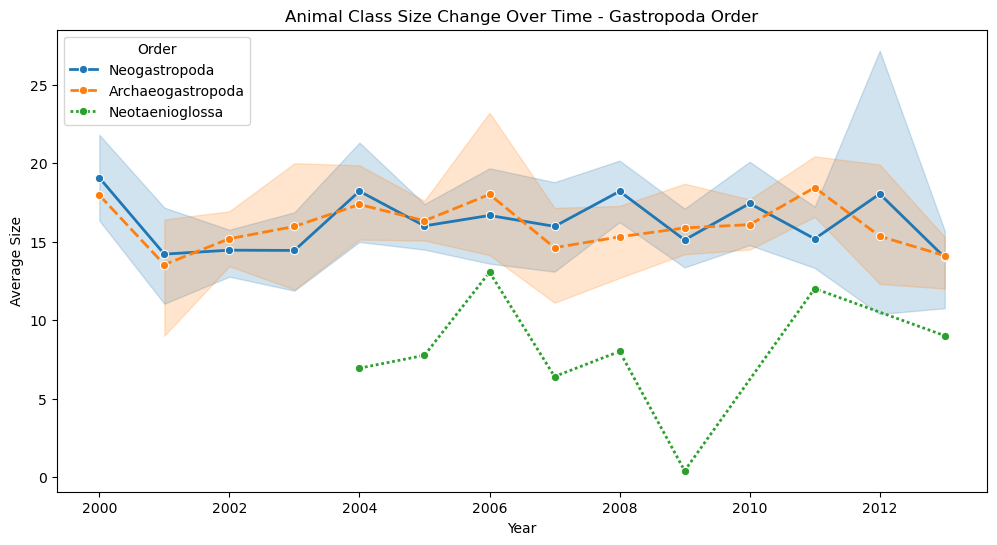

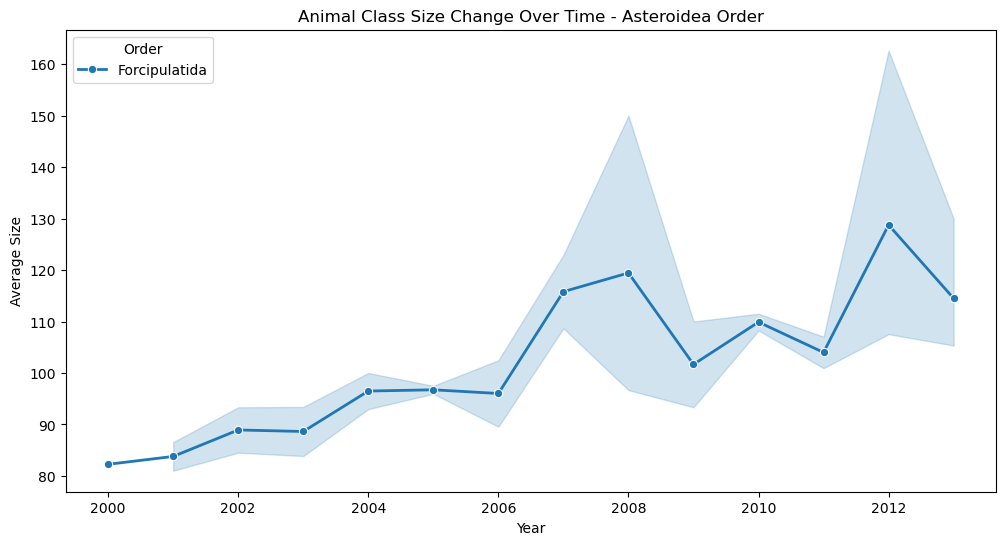

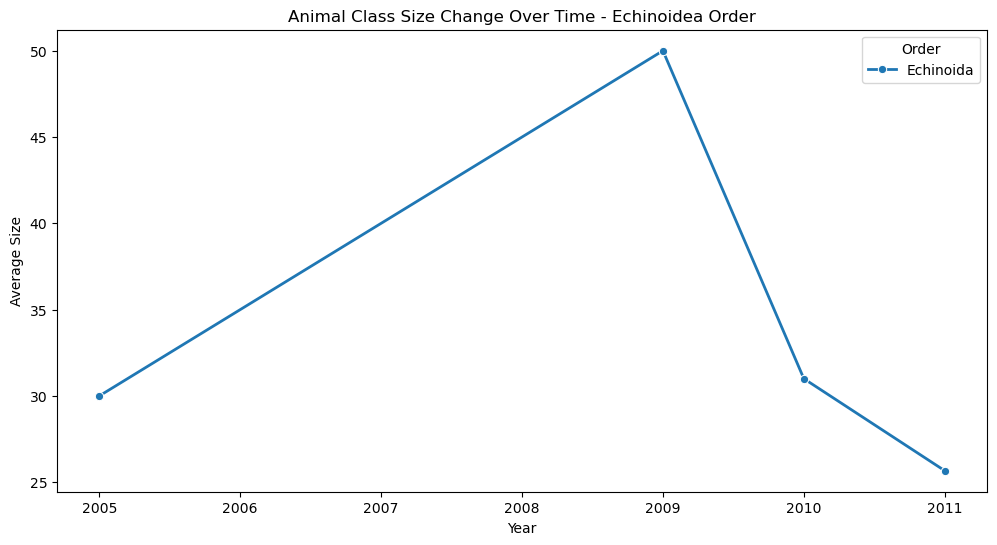

In [19]:
mollusca_gastropoda_df = mollusca_df[mollusca_df["Class"] == "Gastropoda"]
echinodermata_asteroidea_df = echinodermata_df[echinodermata_df["Class"] == "Asteroidea"]
echinodermata_echinoidea_df = echinodermata_df[echinodermata_df["Class"] == "Echinoidea"]

class_dfs = {
    "Gastropoda": mollusca_gastropoda_df, 
    "Asteroidea": echinodermata_asteroidea_df,
    "Echinoidea": echinodermata_echinoidea_df
}

for c, df in class_dfs.items():
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x="Year", y="AvgSize", hue="Order", style="Order", marker="o", linewidth=2)
    for season in size_summary["Season"].unique():
        season_data = size_summary[size_summary["Season"] == season]

    plt.title(f"Animal Class Size Change Over Time - {c} Order")
    plt.xlabel("Year")
    plt.ylabel("Average Size")
    plt.legend(title="Order")
    plt.show()

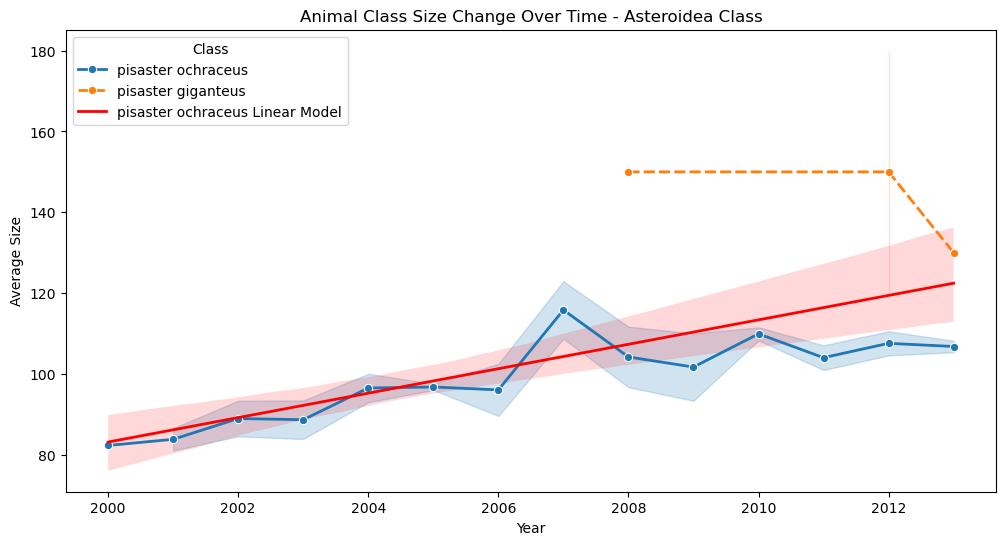

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=echinodermata_asteroidea_df, x="Year", y="AvgSize", hue="Classification_Name", style="Classification_Name", marker="o", linewidth=2)
for season in size_summary["Season"].unique():
    season_data = size_summary[size_summary["Season"] == season]

species_data = echinodermata_asteroidea_df[echinodermata_asteroidea_df['Classification_Name'] == "pisaster ochraceus"]
sns.regplot(data=echinodermata_asteroidea_df, x="Year", y="AvgSize", scatter=False, label=f"pisaster ochraceus Linear Model", line_kws={'color': 'red', 'linewidth': 2})

plt.title("Animal Class Size Change Over Time - Asteroidea Class")
plt.xlabel("Year")
plt.ylabel("Average Size")
plt.legend(title="Class")
plt.show()

## Animal Count Over Time - Sea Stars

1. get dataframe for seastar counts
2. aggregate each data frame by species counts getting a sum.
3. Visualize results - overall and by site

In [21]:
counts_df.columns

Index(['SiteID', 'SamplingSeasonCode', 'Year', 'SeasonSeq', 'PlotID',
       'SixLetterCode', 'SpeciesCount', 'classification_name', 'kingdom',
       'phylum_division', 'class', 'order', 'family', 'intertidal_sitename',
       'intertidal_Latitude', 'intertidal_Longitude'],
      dtype='object')

In [22]:
counts_df_asteroidea = counts_df[counts_df["class"] == "Asteroidea"]

In [23]:
counts_df_asteroidea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9289 entries, 0 to 107721
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   SiteID                9289 non-null   object  
 1   SamplingSeasonCode    9289 non-null   object  
 2   Year                  9289 non-null   int64   
 3   SeasonSeq             9289 non-null   int64   
 4   PlotID                9289 non-null   object  
 5   SixLetterCode         9289 non-null   object  
 6   SpeciesCount          9289 non-null   float64 
 7   classification_name   9289 non-null   object  
 8   kingdom               9289 non-null   object  
 9   phylum_division       9289 non-null   object  
 10  class                 9289 non-null   object  
 11  order                 9289 non-null   object  
 12  family                9289 non-null   object  
 13  intertidal_sitename   9034 non-null   object  
 14  intertidal_Latitude   9034 non-null   category
 15  interti

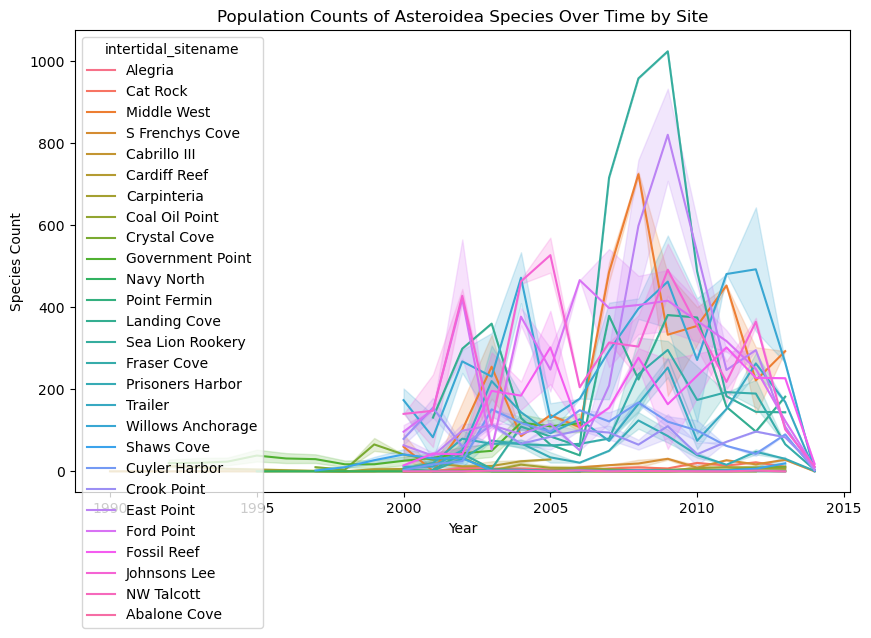

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.lineplot(data=counts_df_asteroidea, x='Year', y='SpeciesCount', hue='intertidal_sitename', markers=True)
plt.title('Population Counts of Asteroidea Species Over Time by Site')
plt.xlabel('Year')
plt.ylabel('Species Count')
plt.show()

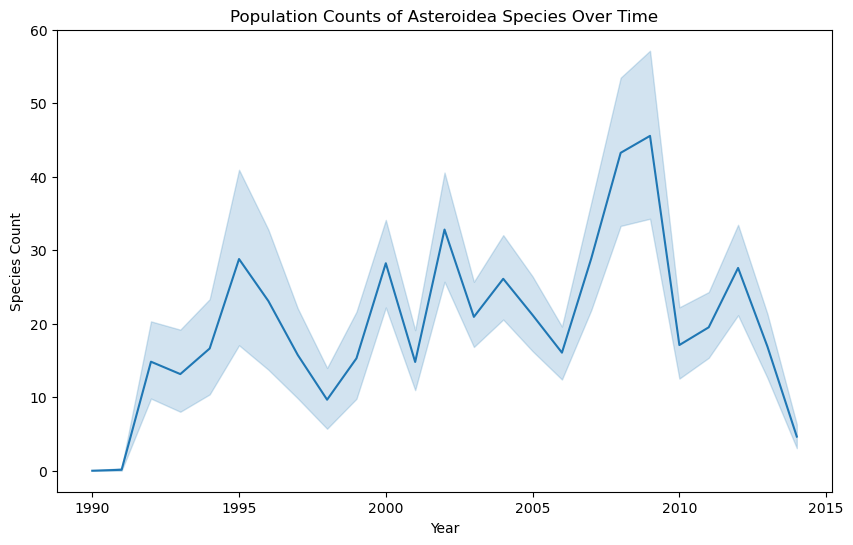

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=counts_df_asteroidea, x='Year', y='SpeciesCount', markers=True)
plt.title('Population Counts of Asteroidea Species Over Time')
plt.xlabel('Year')
plt.ylabel('Species Count')
plt.show()

## Seastar Size and Population Correlation

1. filter the datasets for class Asteroidea (seastars)
2. merge the datasets with their common elements
3. calculate the correlation between species count and species size - yearly
4. separate by season to check for correlation differences when grouped by season

In [26]:
asteroidea_counts = counts_df[counts_df['class'] == 'Asteroidea']
asteroidea_sizes = sizes_df[sizes_df['class'] == 'Asteroidea']

total_count_aggregated = asteroidea_counts.groupby(['SamplingSeasonCode', "Year"]).agg({'SpeciesCount': 'sum'}).reset_index()
average_size_aggregated = asteroidea_sizes.groupby(['SamplingSeasonCode', "Year"]).agg({'SpeciesSize': 'mean'}).reset_index()

merged_asteroidea = pd.merge(total_count_aggregated, average_size_aggregated, on=["SamplingSeasonCode", "Year"])
merged_asteroidea

,SamplingSeasonCode,Year,SpeciesCount,SpeciesSize
0,FA00,2000,3115.0,82.250000
1,FA01,2001,2796.0,81.000000
2,FA02,2002,8883.0,93.333333
3,FA03,2003,6910.0,93.398058
4,FA04,2004,9195.0,92.970297
5,FA05,2005,8088.0,97.500000
6,FA06,2006,7776.0,89.552239
7,FA07,2007,13214.0,108.684211
8,FA08,2008,19983.0,96.666667
9,FA09,2009,14940.0,93.333333


In [27]:
merged_asteroidea['Season'] = merged_asteroidea['SamplingSeasonCode'].str[:2]
merged_asteroidea

,SamplingSeasonCode,Year,SpeciesCount,SpeciesSize,Season
0,FA00,2000,3115.0,82.250000,FA
1,FA01,2001,2796.0,81.000000,FA
2,FA02,2002,8883.0,93.333333,FA
3,FA03,2003,6910.0,93.398058,FA
4,FA04,2004,9195.0,92.970297,FA
5,FA05,2005,8088.0,97.500000,FA
6,FA06,2006,7776.0,89.552239,FA
7,FA07,2007,13214.0,108.684211,FA
8,FA08,2008,19983.0,96.666667,FA
9,FA09,2009,14940.0,93.333333,FA


In [28]:
season_order = ['FA', 'SP']
merged_asteroidea['Season'] = pd.Categorical(merged_asteroidea['Season'], categories=season_order, ordered=True)
merged_asteroidea

,SamplingSeasonCode,Year,SpeciesCount,SpeciesSize,Season
0,FA00,2000,3115.0,82.250000,FA
1,FA01,2001,2796.0,81.000000,FA
2,FA02,2002,8883.0,93.333333,FA
3,FA03,2003,6910.0,93.398058,FA
4,FA04,2004,9195.0,92.970297,FA
5,FA05,2005,8088.0,97.500000,FA
6,FA06,2006,7776.0,89.552239,FA
7,FA07,2007,13214.0,108.684211,FA
8,FA08,2008,19983.0,96.666667,FA
9,FA09,2009,14940.0,93.333333,FA


In [29]:
aggregated_merged = merged_asteroidea.groupby(['Year', 'Season']).agg({'SpeciesCount': 'sum', 'SpeciesSize': 'sum'}).reset_index()
aggregated_merged = aggregated_merged[aggregated_merged["Year"] > 2000]
aggregated_merged

C:\Users\suvim\AppData\Local\Temp\ipykernel_46056\2764923890.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_merged = merged_asteroidea.groupby(['Year', 'Season']).agg({'SpeciesCount': 'sum', 'SpeciesSize': 'sum'}).reset_index()


,Year,Season,SpeciesCount,SpeciesSize
2,2001,FA,2796.0,81.000000
3,2001,SP,2901.0,86.551724
4,2002,FA,8883.0,93.333333
5,2002,SP,6342.0,84.512195
6,2003,FA,6910.0,93.398058
7,2003,SP,7074.0,83.853211
8,2004,FA,9195.0,92.970297
9,2004,SP,9372.0,100.000000
10,2005,FA,8088.0,97.500000
11,2005,SP,6697.0,95.959596


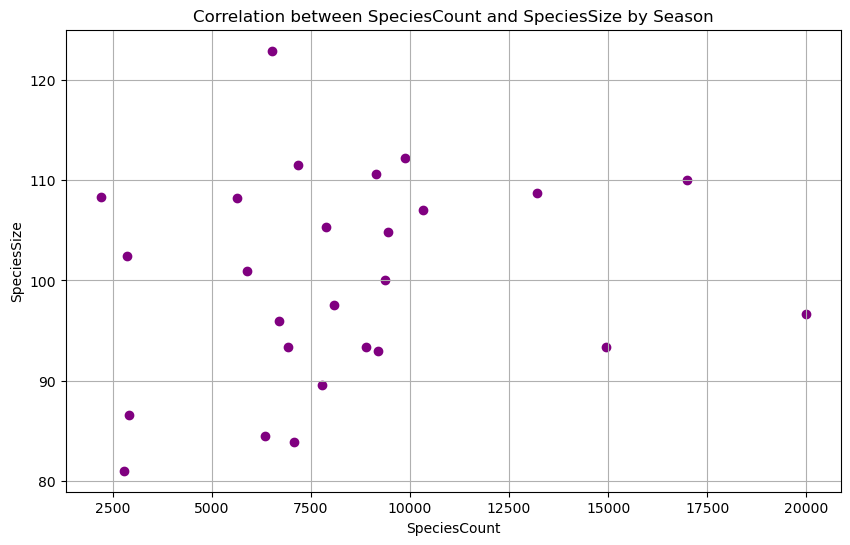

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_merged['SpeciesCount'], aggregated_merged['SpeciesSize'], color='purple', label='Data Points')
plt.title('Correlation between SpeciesCount and SpeciesSize by Season')
plt.xlabel('SpeciesCount')
plt.ylabel('SpeciesSize')
plt.grid(True)
plt.show()

In [31]:
overall_correlation = aggregated_merged["SpeciesCount"].corr(aggregated_merged["SpeciesSize"])
print(f"Correlation: {overall_correlation}")

Correlation: 0.17160824853904083


In [32]:
yearly_fall_size_pop = aggregated_merged[aggregated_merged["Season"] == "FA"]
yearly_spring_size_pop = aggregated_merged[aggregated_merged["Season"] == "SP"]

In [33]:
fall_correlation = yearly_fall_size_pop["SpeciesCount"].corr(yearly_fall_size_pop["SpeciesSize"])
print(f"Fall Correlation: {fall_correlation}")

Fall Correlation: 0.2181879418259403


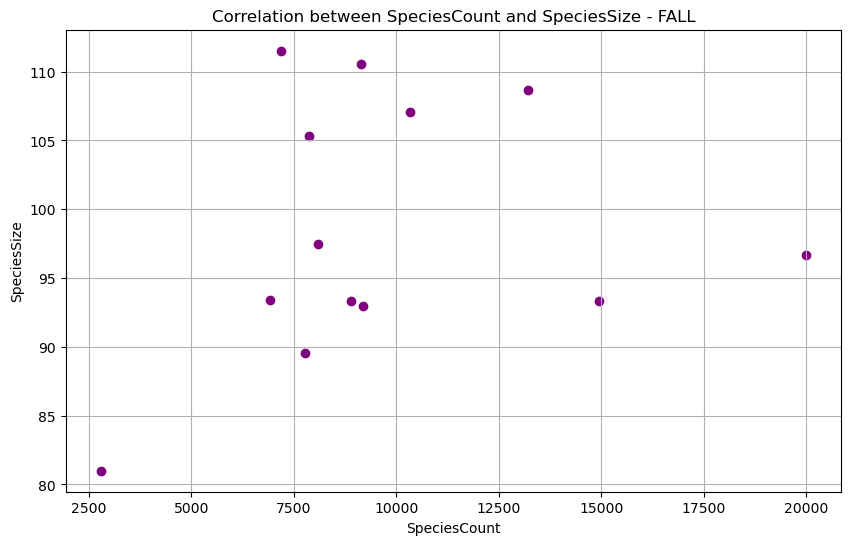

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(yearly_fall_size_pop['SpeciesCount'], yearly_fall_size_pop['SpeciesSize'], color='purple', label='Data Points')
plt.title('Correlation between SpeciesCount and SpeciesSize - FALL')
plt.xlabel('SpeciesCount')
plt.ylabel('SpeciesSize')
plt.grid(True)
plt.show()

In [35]:
spring_correlation = yearly_spring_size_pop["SpeciesCount"].corr(yearly_spring_size_pop["SpeciesSize"])
print(f"Spring Correlation: {spring_correlation}")

Spring Correlation: 0.25500133218703347


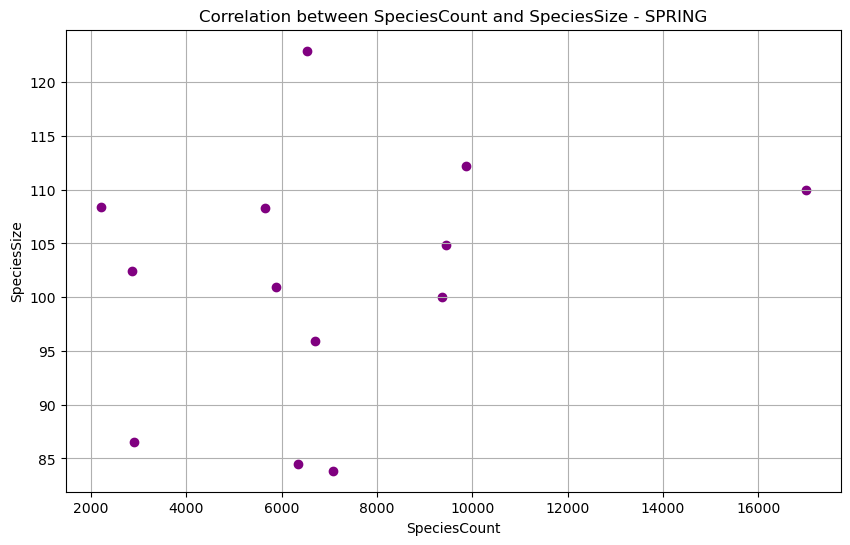

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(yearly_spring_size_pop['SpeciesCount'], yearly_spring_size_pop['SpeciesSize'], color='purple', label='Data Points')
plt.title('Correlation between SpeciesCount and SpeciesSize - SPRING')
plt.xlabel('SpeciesCount')
plt.ylabel('SpeciesSize')
plt.grid(True)
plt.show()